# Plot models in arxiv

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import corner
from chainconsumer import ChainConsumer
import p1d_arxiv

### Specify suite of simulations to use and read metadata

In [2]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_medium/'
# label identifying the particular skewer extraction (number of skewers per side and cell width in Mpc)
skewers_label='Ns100_wM0.1'
#basedir='../mini_sim_suite/'
#skewers_label='Ns50_wM0.1'
arxiv=p1d_arxiv.ArxivP1D(basedir=basedir,skewers_label=skewers_label,verbose=True)

latin hyper-cube data {'param_space': {'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'Delta2_star': {'ip': 1, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'mu_He': {'ip': 2, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}}, 'nsamples': 5, 'samples': {'0': [0.961, 0.39, 1.25], '1': [0.965, 0.31, 0.9500000000000001], '2': [0.969, 0.35, 1.55], '3': [0.973, 0.27, 0.65], '4': [0.957, 0.43000000000000005, 1.85]}}
simulation suite has 5 samples
0 sample has sim params = [0.961, 0.39, 1.25]
simulation has 7 redshifts
/Users/font/CosmoData/test_sim_emulator/test_medium//sim_pair_0 does not have this snapshot 0
1 sample has sim params = [0.965, 0.31, 0.9500000000000001]
simulation has 7 redshifts
/Users/font/CosmoData/test_sim_emulator/test_medium//sim_pair_1 does not have this snapshot 0
2 sample has sim params = [0.969, 0.35, 1.55]
simulation has 7 redshifts
/Users/font/Cosmo

In [3]:
Nmodels=len(arxiv.data)
print('# models =',Nmodels)

# models = 8250


In [4]:
labels=[r'$\Delta_p^2$',r'$n_p$',r'$\alpha_p$',r'$f_p$',r'$\bar F$',r'$\sigma_T$ [Mpc]',r'$\gamma$']
Npar=len(labels)
database=np.empty([Nmodels,Npar])
database[:,0]=arxiv.Delta2_p
database[:,1]=arxiv.n_p
database[:,2]=arxiv.alpha_p
database[:,3]=arxiv.f_p
database[:,4]=arxiv.mF
database[:,5]=arxiv.sigT_Mpc
database[:,6]=arxiv.gamma

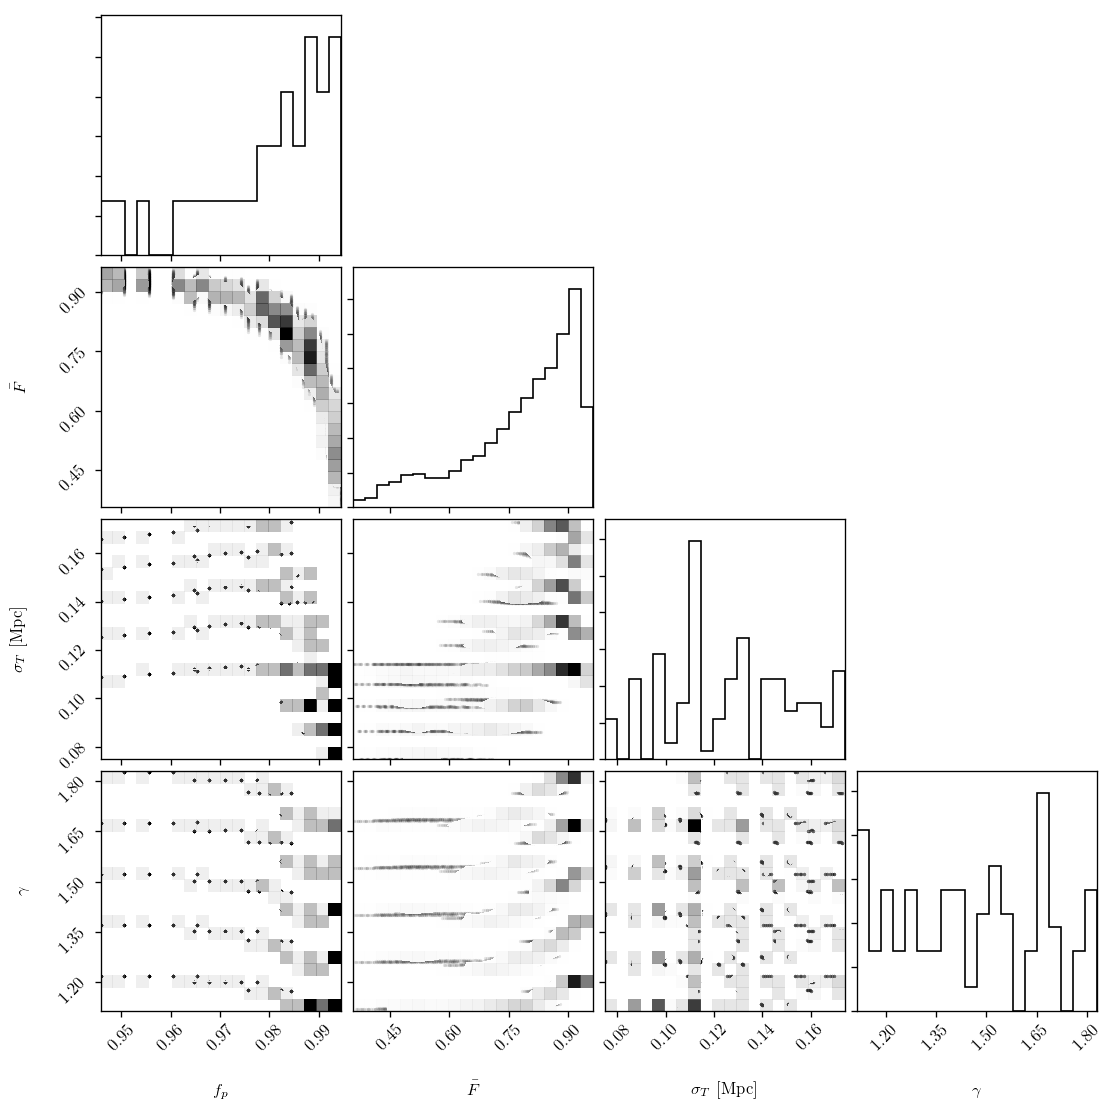

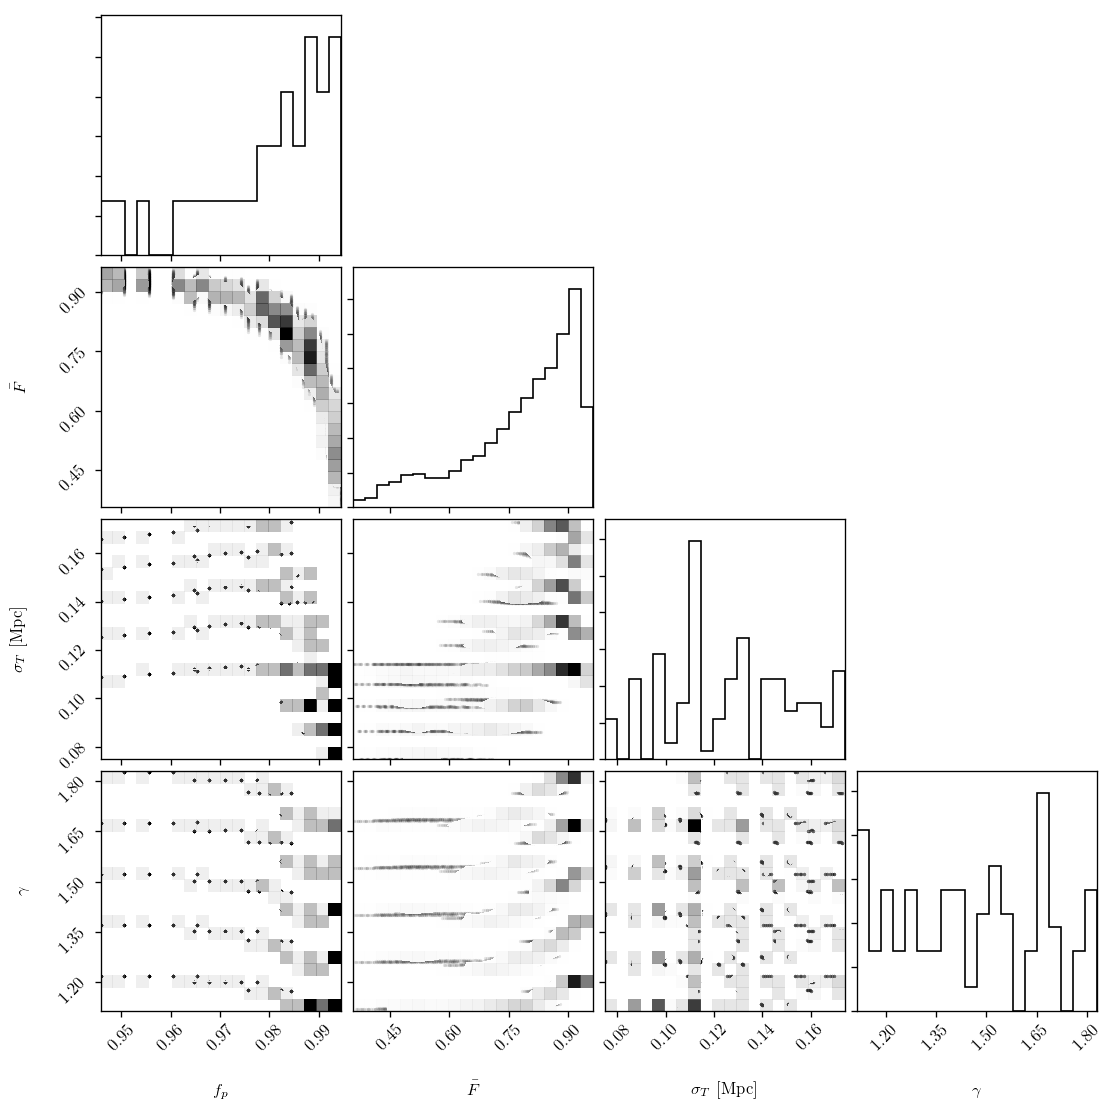

In [7]:
corner.corner(database[:,3:], labels=labels[3:],plot_contours=False)

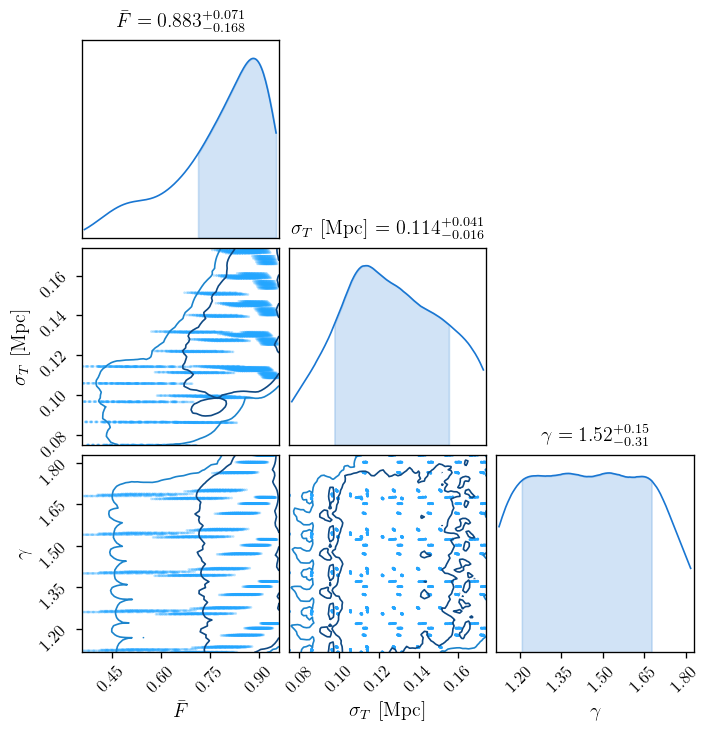

In [6]:
c = ChainConsumer()
c.add_chain(database[:,4:], parameters=labels[4:],marker_style = 'x', marker_size = 10, shade=False)
c.configure(kde = [1.], cloud=True)
fig = c.plotter.plot(figsize = (6,6))